# Concrete Strength Prediction

In this project we will predict the compressive strength of a concrete based on certain parameters 

Let us check the parameter involved :

*   Cement --quantitative-- kg in a m3 mixture

*   Blast Furnace Slag --quantitative--kg in a m3 mixture

*   Fly Ash --quantitative--kg in a m3 mixture
*   Water-- quantitative-- kg in a m3 mixture

*   Superplasticizer --quantitative--kg in a m3

*   Coars Aggregate-- quantitative-- kg in a m3 mixture

*   Fine Aggregate --quantitative--kg in a m3 mixture

*   Age --quantitative-- Day (1 ~ 365)
*   Concrete compressive strength --quantitative--MPa, megapascals

This dataset contrains the following instances and attributes

*   Number of instances: 1029

*   Number of attributes: 9 continuos attributes








In [1]:
import pandas as pd
HDNames = ['Cement','BFS','FLA','Water','SP','CA','FA','Age','CCS']


In [2]:
Data = pd.read_excel('ConcreteData.xlsx',names=HDNames)

In [3]:
print(Data.head(20))

    Cement    BFS  FLA  Water   SP      CA     FA  Age        CCS
0    540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  61.887366
1    332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  40.269535
2    332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  41.052780
3    198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  44.296075
4    266.0  114.0  0.0  228.0  0.0   932.0  670.0   90  47.029847
5    380.0   95.0  0.0  228.0  0.0   932.0  594.0  365  43.698299
6    380.0   95.0  0.0  228.0  0.0   932.0  594.0   28  36.447770
7    266.0  114.0  0.0  228.0  0.0   932.0  670.0   28  45.854291
8    475.0    0.0  0.0  228.0  0.0   932.0  594.0   28  39.289790
9    198.6  132.4  0.0  192.0  0.0   978.4  825.5   90  38.074244
10   198.6  132.4  0.0  192.0  0.0   978.4  825.5   28  28.021684
11   427.5   47.5  0.0  228.0  0.0   932.0  594.0  270  43.012960
12   190.0  190.0  0.0  228.0  0.0   932.0  670.0   90  42.326932
13   304.0   76.0  0.0  228.0  0.0   932.0  670.0   28  47.813782
14   380.0

In [4]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cement  1029 non-null   float64
 1   BFS     1029 non-null   float64
 2   FLA     1029 non-null   float64
 3   Water   1029 non-null   float64
 4   SP      1029 non-null   float64
 5   CA      1029 non-null   float64
 6   FA      1029 non-null   float64
 7   Age     1029 non-null   int64  
 8   CCS     1029 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


In [5]:
summary = Data.describe()
print(summary)

            Cement          BFS          FLA        Water           SP  \
count  1029.000000  1029.000000  1029.000000  1029.000000  1029.000000   
mean    280.914091    73.967298    54.239796   181.585374     6.206710   
std     104.245542    86.290255    64.005258    21.357226     5.975279   
min     102.000000     0.000000     0.000000   121.750000     0.000000   
25%     192.000000     0.000000     0.000000   164.900000     0.000000   
50%     272.800000    22.000000     0.000000   185.000000     6.350000   
75%     350.000000   143.000000   118.270000   192.000000    10.160000   
max     540.000000   359.400000   200.100000   247.000000    32.200000   

                CA           FA          Age          CCS  
count  1029.000000  1029.000000  1029.000000  1029.000000  
mean    972.853401   773.673712    45.679300    35.774912  
std      77.763459    80.156602    63.198226    16.656880  
min     801.000000   594.000000     1.000000     2.331808  
25%     932.000000   732.600000  

**Note**: Boxplot is a graphical representation used to describe the distribution of a sample by simple dispersion and position indexes

Seaborns and there are some important features:


*   A dataset-oriented API for examing relationships between multiple variables
*   Specialized support for using categorical variables to show observations and aggregate statistics

*   Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data
*   Automatic estimation and plotting of linear regression models for different kinds of dependent varaibles


*   Convient views onto the overal structure of complex datasets
*   High level abstractions for structuring multiplot grids that let you easily build complex visualizations


*   Concise control over Matplotlon figure styling with several built-in theme
*  Tools for choosing color palettes that faithfully reveal patterns in your data









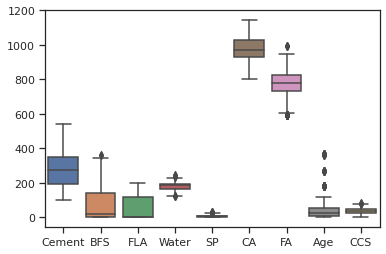

In [6]:
import seaborn as sns
sns.set(style="ticks") # color of the axes. The available styles are darkgrid, white grid, dark, white, and ticks
sns.boxplot(data=Data)

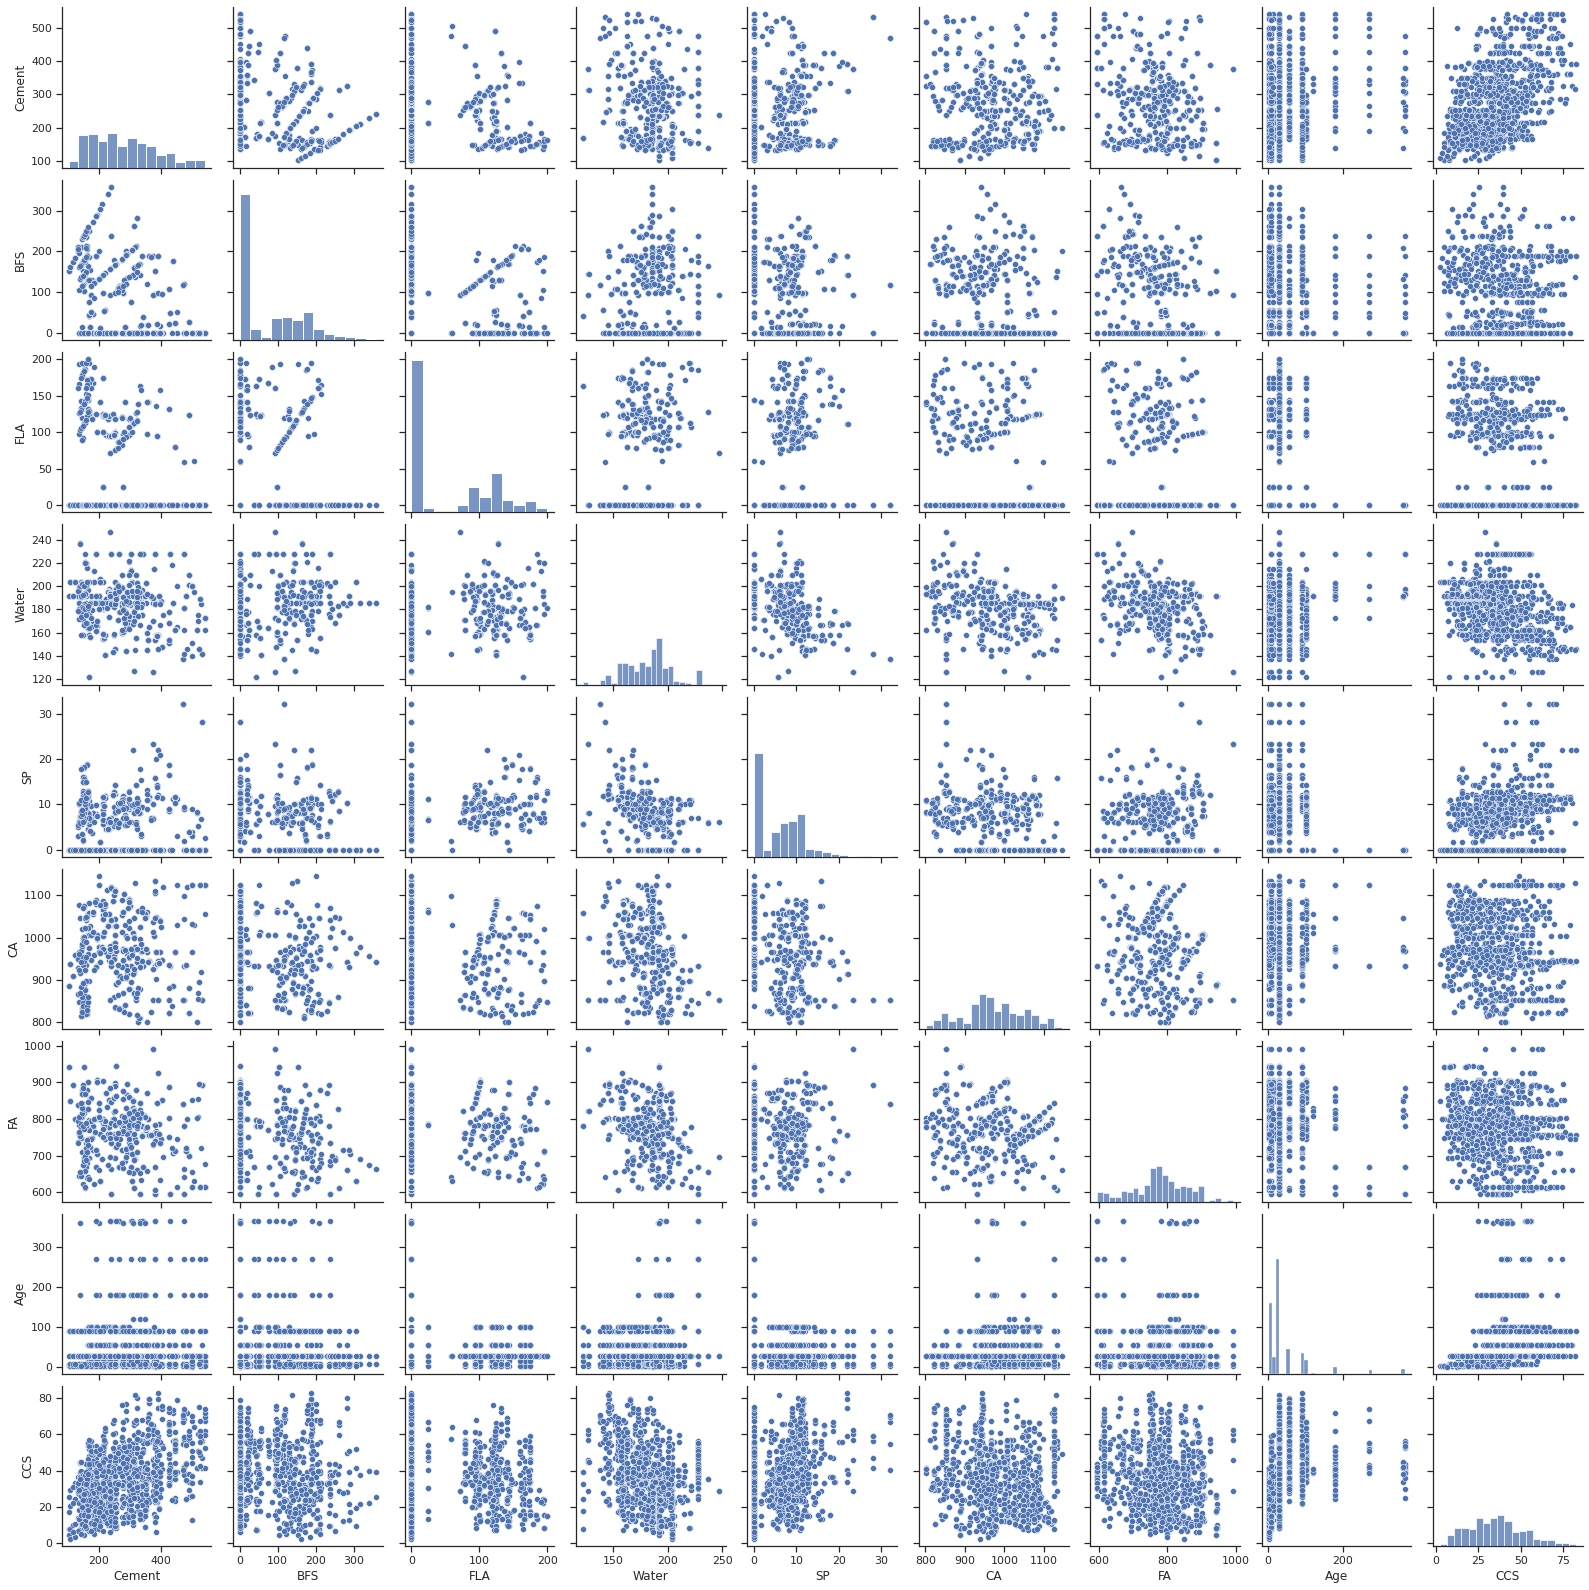

In [7]:
sns.pairplot(data=Data)

Focusing on the last line of the graph, it contains scatter plots of the target of our concrete compressive strength (CCS) data compared to the predictors. Except foer Cement, there is no particular trend.

$x(scaled) = (x-x(min)/(x(max)-x(min)))$

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(Data))

MinMaxScaler()


In [9]:
DataScaled= scaler.fit_transform(Data)
DataScaled= pd.DataFrame(DataScaled, columns=HDNames)

In [10]:
summary = DataScaled.describe()
print(summary)

            Cement          BFS          FLA        Water           SP  \
count  1029.000000  1029.000000  1029.000000  1029.000000  1029.000000   
mean      0.408480     0.205808     0.271063     0.477728     0.192755   
std       0.238004     0.240095     0.319866     0.170517     0.185568   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.205479     0.000000     0.000000     0.344511     0.000000   
50%       0.389954     0.061213     0.000000     0.504990     0.197205   
75%       0.566210     0.397885     0.591054     0.560878     0.315528   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                CA           FA          Age          CCS  
count  1029.000000  1029.000000  1029.000000  1029.000000  
mean      0.499574     0.450762     0.122745     0.416646  
std       0.226057     0.201095     0.173621     0.207517  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.380814     0.347717  

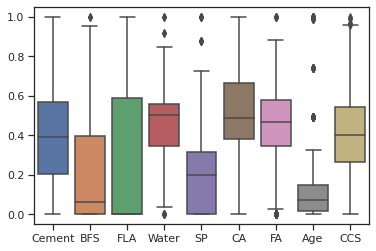

In [11]:
sns.boxplot(data=DataScaled)

In [12]:
from sklearn.model_selection import train_test_split
Predictors = pd.DataFrame(DataScaled.iloc[:,:8])
Response = pd.DataFrame(DataScaled.iloc[:,8])

In [13]:
Pred_train,Pred_test,Resp_train,Resp_test=train_test_split(Predictors, Response,test_size = 0.30, random_state=1) #30% of the data is divided up as test data
print(Pred_train.shape)
print(Pred_test.shape)
print(Resp_train.shape)
print(Resp_test.shape)

(720, 8)
(309, 8)
(720, 1)
(309, 1)






1.   Import the Sequential from keras.models

1.   Stack layers using the .add() method
2.   Configure the learning process using .compile() method
2.   Train the model on train dataset using .fit() method








In [14]:
from keras.models import Sequential
from keras.layers import Dense
# fully connected neural network with 4 levels (2 hidden layers)
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])



1.   adam optimizer: This is an algorithm for first order, gradient-based optimization of stochastic objective function based on adaptive estimates of lower order moments
2.   mean_squared_error loss function: Mean squared error (MSE) measures the average of the squares errors- tahat is the average squared difference between the actual estimaed values and what's to be estimated. MSE is a measure of the quality of an estimator- it's always non-negative and the coloser the values are to zero, the better


1.   accuracy metric: A metric is a function that is used to evaluate the performance of your model during training and testing





In [ ]:
model.fit(Pred_train,Resp_train,epochs=1000, verbose=1)

Epoch 1/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.2030 - accuracy: 4.4290e-04
Epoch 2/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.0012
Epoch 3/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0494 - accuracy: 0.0000e+00
Epoch 4/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 7.8069e-04
Epoch 5/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0338 - accuracy: 0.0012
Epoch 6/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0303 - accuracy: 6.0088e-04
Epoch 7/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 3.0203e-04
Epoch 8/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.0017
Epoch 9/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0225 - accuracy: 0.0011
Epoch 10/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.020



*   Pred_train: This is an array of predictors training data
*   Resp_train: This is an array of response data


*   epochs = 1000: This is the number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
*   verbose = 1: this is an integer: 0,1,and 2. Here the different verbosity modes represent the following; 0 = silent, 1 = progress bar and 2 = one line per epoch





In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


Calculate the coefficient of determination (R-squared)

*   R-squared is a meausre of how well a model can predict the data, and it lies between 0 and 1; The higher the value of the coefficient of determination, the better the mode is at predicting the data.
*   R-squared (also denoted as R2) is defined as the proportion of variances in the depedent variable that is predictable from the independent variable.
To calcalate the coefficient of determination we can use the r2_score() function






In [ ]:
from sklearn.metrics import r2_score
# to calcualte R2 we need ground truth target values and the estimated target values
y_predKM = model.predict(Pred_test)
print('Coefficient of determination of Keras Model')
print(r2_score(Resp_test,y_predKM))

Coefficient of determination of Keras Model
0.8654878978040251


Outlier distort data analysis result

---
We will use Turkey's method which will use the interquartile range (IQR) approach


---

IQR  = DataScaled.quantile(0.75) - DataScaled.quantile(0.25)


In [ ]:
Q1 = DataScaled.quantile(0.25)
Q3= DataScaled.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Cement    0.360731
BFS       0.397885
FLA       0.591054
Water     0.216367
SP        0.315528
CA        0.283140
FA        0.229303
Age       0.134615
CCS       0.277114
dtype: float64


In [ ]:
DataScaledOut = DataScaled[~((DataScaled < (Q1 - 1.5 * IQR)) | (DataScaled > (Q3 + 1.5 * IQR))).any(axis=1)]
DataScaledOut.shape
#1029 to 925

(925, 9)

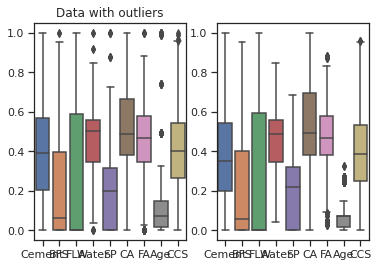

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(121)
sns.boxplot(data = DataScaled)
plt.title("Data with outliers")

plt.subplot(122)
sns.boxplot(data = DataScaledOut)

In [ ]:
Predictors2 = pd.DataFrame(DataScaledOut.iloc[:,:8])
Response2  =pd.DataFrame(DataScaledOut.iloc[:,8])

In [ ]:
Pred_train2,Pred_test2,Resp_train2,Resp_test2=train_test_split(Predictors2, Response2,test_size = 0.30, random_state=1) #30% of the data is divided up as test data
print(Pred_train2.shape)
print(Pred_test2.shape)
print(Resp_train2.shape)
print(Resp_test2.shape)

(647, 8)
(278, 8)
(647, 1)
(278, 1)


In [ ]:
# fully connected neural network with 4 levels (2 hidden layers)
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu')) # input layer which has 20 neurons, 8 input colums
model.add(Dense(10, activation='relu'))# second layer which has 10 neurons
model.add(Dense(10, activation='relu'))# third layers which has 10 neurons

model.add(Dense(1, activation='linear')) # output layer which has 1 neuron

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
model.fit(Pred_train,Resp_train,epochs=1000, verbose=1)

Epoch 1/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.0014
Epoch 2/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0359 - accuracy: 5.1950e-04
Epoch 3/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 5.1950e-04
Epoch 4/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.0017
Epoch 5/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 2.3693e-04
Epoch 6/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 4.4290e-04
Epoch 7/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 4.4290e-04
Epoch 8/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 0.0012
Epoch 9/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0141 - accuracy: 0.0017
Epoch 10/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.012

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Y_predKM2 = model.predict(Pred_test2)

In [ ]:
print('Coefficient of determination if Neural Network Model without outliers')
print(r2_score(Resp_test2,Y_predKM2))

Coefficient of determination if Neural Network Model without outliers
0.9173411446000757


Text(0.5, 1.0, 'Data with outliers')

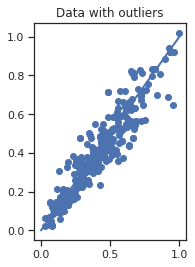

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.scatter(Resp_test,y_predKM)
plt.plot([0,1],[0,1],linewidth=2)
plt.title("Data with outliers")

Text(0.5, 1.0, 'Data without outliers')

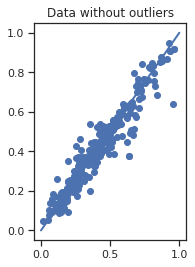

In [ ]:
plt.subplot(122)
plt.scatter(Resp_test2,Y_predKM2)
plt.plot([0,1],[0,1],linewidth=2)
plt.title("Data without outliers")